In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [2]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(len(x_train))

60000


In [4]:
print(len(x_test))

10000


In [5]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [6]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [7]:
# resize and normalize
image_size = x_train.shape[1]
print(image_size)
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

28


In [8]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [9]:
#spli validation from train
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size = 0.2, random_state=42)

In [11]:
# network parameters
input_shape = (image_size, image_size)
batch_size = 64 #128
units = 256
dropout = 0.2
epochs = 30

In [12]:
#model is RNN with 256 units
model = Sequential()

#model.add(LSTM(units=units,input_shape=input_shape))
model.add(LSTM(units=units,dropout=dropout,input_shape=input_shape))

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(356, activation='relu'))
model.add(Dense(356, activation='relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               291840    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 356)               45924     
                                                                 
 dense_3 (Dense)             (None, 356)               127092    
                                                                 
 dense_4 (Dense)             (None, 10)                3570      
                                                                 
 activation (Activation)     (None, 10)                0

In [13]:
#compile the model
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# train the network
history=model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(x_val,y_val))

Epoch 1/30
750/750 [==============================] - 40s 51ms/step - loss: 2.2772 - accuracy: 0.1976 - val_loss: 2.2290 - val_accuracy: 0.2644
Epoch 2/30
750/750 [==============================] - 38s 51ms/step - loss: 2.0051 - accuracy: 0.3030 - val_loss: 1.6481 - val_accuracy: 0.4260
Epoch 3/30
750/750 [==============================] - 40s 53ms/step - loss: 1.3914 - accuracy: 0.4967 - val_loss: 1.0315 - val_accuracy: 0.6169
Epoch 4/30
750/750 [==============================] - 39s 52ms/step - loss: 0.8271 - accuracy: 0.7104 - val_loss: 0.6398 - val_accuracy: 0.7794
Epoch 5/30
750/750 [==============================] - 39s 52ms/step - loss: 0.5935 - accuracy: 0.7955 - val_loss: 0.5247 - val_accuracy: 0.8194
Epoch 6/30
750/750 [==============================] - 40s 53ms/step - loss: 0.4635 - accuracy: 0.8448 - val_loss: 0.4165 - val_accuracy: 0.8660
Epoch 7/30
750/750 [==============================] - 39s 52ms/step - loss: 0.3796 - accuracy: 0.8746 - val_loss: 0.4157 - val_accuracy:

1500/1500 [==============================] - 26s 17ms/step - loss: 0.1272 - accuracy: 0.9568
0.9568333625793457
0.12720753252506256
313/313 [==============================] - 6s 18ms/step - loss: 0.1489 - accuracy: 0.9513
0.9513000249862671
0.1488848775625229


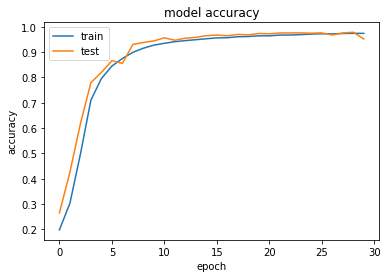

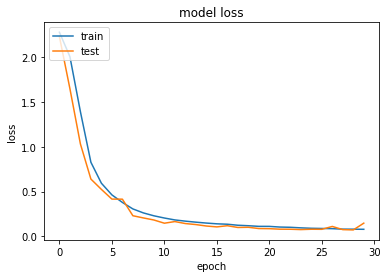

In [14]:
train_loss , train_accuracy=model.evaluate(x_train,y_train)
print(train_accuracy)
print(train_loss)
loss , accuracy=model.evaluate(x_test,y_test)
print(accuracy)
print(loss)
y_pred = model.predict(x_test)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions = model.predict(x_test, steps=len(x_test), verbose=0)
#y_pred=model.predict(x_test)
#y_pred = np.round(y_pred)
y_pred = np.argmax(predictions, axis=-1)

y_true=np.argmax(y_test, axis=-1)

cm = confusion_matrix(y_true, y_pred)
print(cm)

[[ 961    0    2    0    2    0    2    0    5    8]
 [   0 1118    1    4    0    0    2    4    4    2]
 [   4    0  987   29    1    0    1    4    5    1]
 [   0    0    1  990    0    2    0    0    0   17]
 [   1    0    1    0  904    0    2    3    2   69]
 [   1    0    0   14    0  862    2    1    4    8]
 [   6    2    3    0    6    3  936    0    2    0]
 [   0    0    6   17    0    0    0  821    0  184]
 [   1    0    3   13    0    3    2    0  933   19]
 [   2    0    0    1    2    1    0    0    2 1001]]


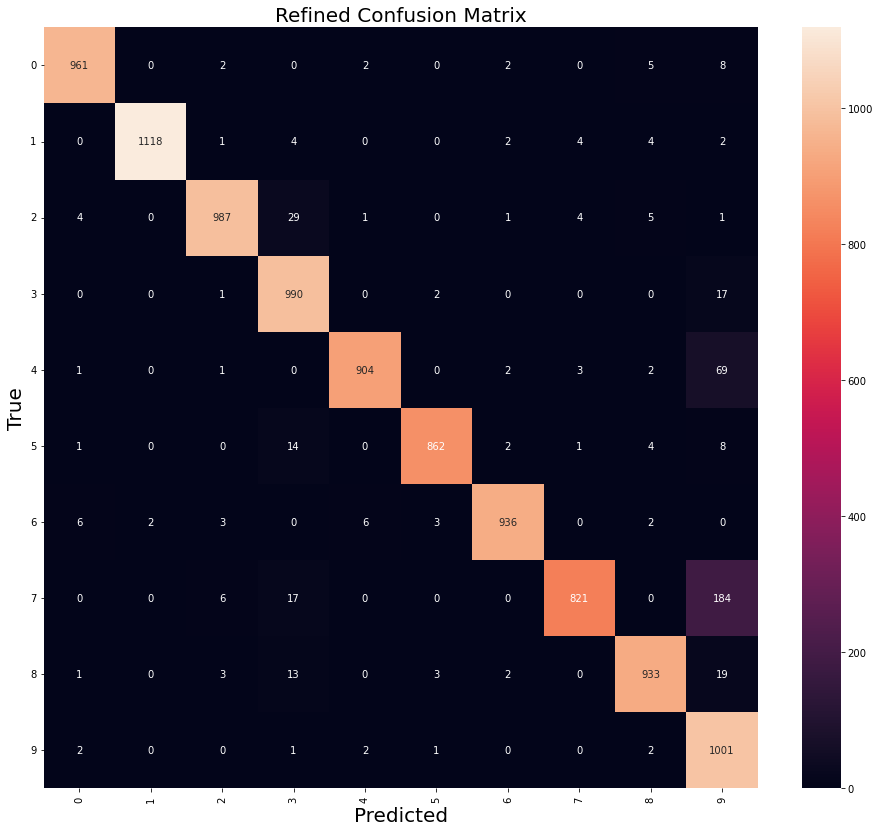

In [16]:
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
#ax.xaxis.set_ticklabels(num_labels,fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
#ax.yaxis.set_ticklabels(num_labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()